**RUSHIL VYAS (2K19/EE/208)**

**BASIC DBSCAN**

IMPORTING LIBERARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure 
from pandas import DataFrame


GERERATING DATASET

In [ ]:
X, _ = make_blobs(n_samples=400, centers=4, n_features=2, random_state=20) 
print (X)



VISUALIZING DATASET

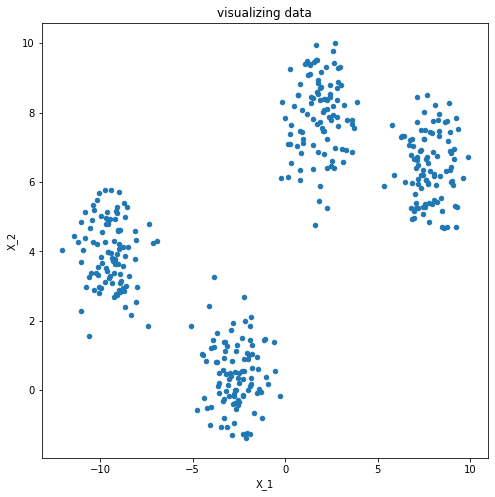

In [ ]:
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(8,8))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('visualizing data')
plt.show()

CALLING DBSCAN AND GENERATING CLUSTERS

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=4).fit(X) 
cluster = clustering.labels_
n_clusters = len(set(cluster)) - (1 if -1 in cluster else 0 )
print("No of clusters generated :",n_clusters)

No of clusters generated : 4


FUNCTION FOR COLORING CLUSTERS AND NOISE AND PLOTING

In [ ]:
def DBSCAN_CLUSTERING(X, cluster):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {-1:'red', 0:'blue', 1:'orange', 2:'green', 3:'skyblue', 4:'pink', 5:'purple', 6:'magenta', 7:'teal', 8:'brown'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.title('clustered data')
    plt.show()

CLUSTERED RESULT

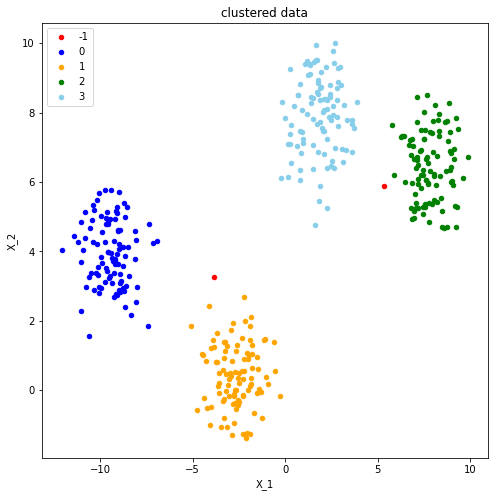

In [ ]:
DBSCAN_CLUSTERING(X, cluster)

**CLUSTERING DATA FOR A MALL**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

IMPORTING DATA

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


RENAMING DATA 

In [ ]:
dataset.rename(columns={'Genre':'Gender','Annual Income (k$)':'Income','Spending Score (1-100)':'SpendScore'},inplace=True)
dataset.head()


,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


ALL POSSIBLE GRAPHS OUT OF DATA


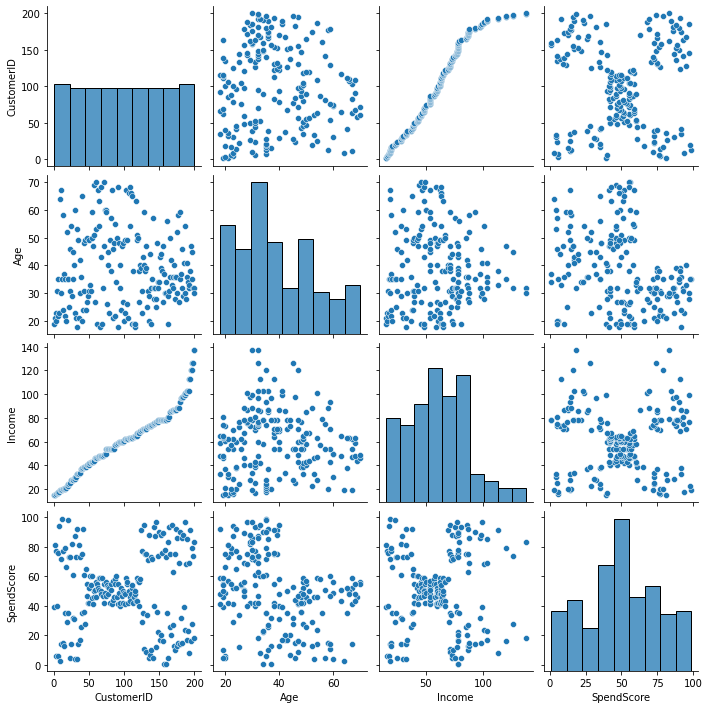

In [ ]:
sns.pairplot(dataset)

CHOSSING COLOUMS TO BE CLUSTERED

In [ ]:
a = int(input(" first coloum :"))
b = int(input(" second coloum : "))
X = dataset.iloc[:,[a,b]].values


 first coloum :3
 second coloum : 4


VISUALIZING DATA 


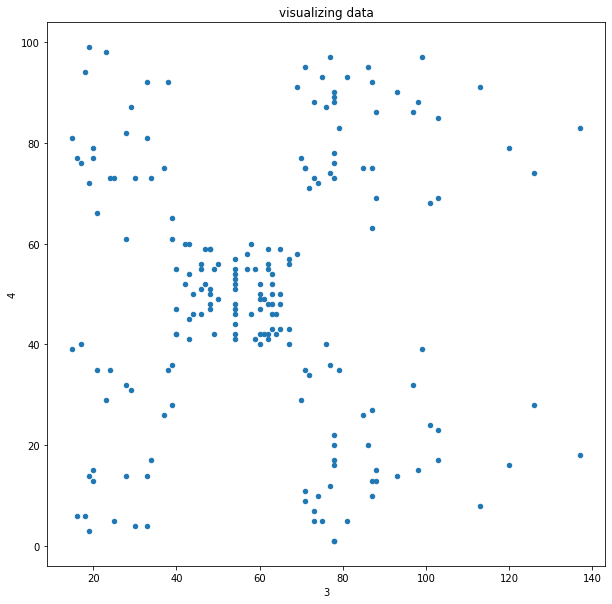

In [ ]:
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel(a)
plt.ylabel(b)
plt.title('visualizing data')
plt.show()


CALLING DBSCAN AND GENERATING CLUSTERS 


In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=3).fit(X) #selecting epsilon and minimum points value
cluster = clustering.labels_
n_clusters = len(set(cluster)) - (1 if -1 in cluster else 0 )
print("No of clusters generated :",n_clusters)

No of clusters generated : 12


FUNCTION FOR COLORING CLUSTERS AND NOISE AND PLOTING

In [ ]:
def DBSCAN_CLUSTERING(X, cluster):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {-1:'red', 0:'blue', 1:'orange', 2:'green', 3:'skyblue', 4:'pink', 5:'purple', 6:'magenta', 7:'teal', 8:'lime', 9:'olive', 10:'yellow', 11:'navy'}
    fig, ax = plt.subplots(figsize=(10,10))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title('clustered data for mall')
    plt.show()

CLUSTERED RESULT

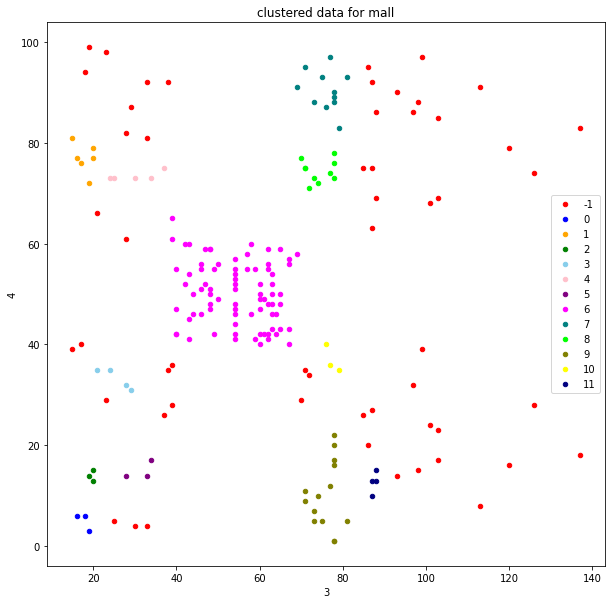

In [ ]:
DBSCAN_CLUSTERING(X, cluster)


**PARAMETER TUNING**


**ELBOW METHOD**

IMPORTING LIBERARIES

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

GENERATING DATASSET

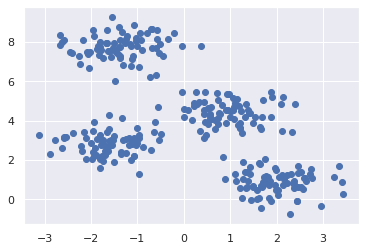

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

CALACULATING DISTANCE FROM NEAREST NEIGHBOURS


In [ ]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

SORT AND PLOT RESULTS 

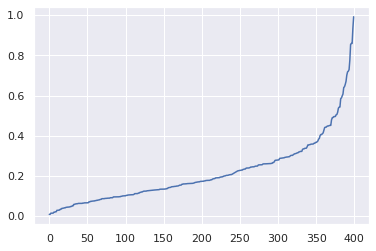

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


CALLING DBSCAN AND COLOURING

In [ ]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)
clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

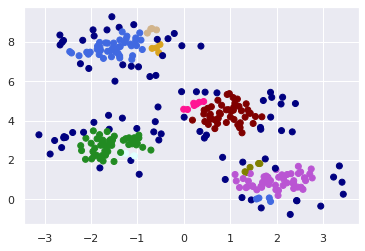

In [ ]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))


**ELBOW METHOD FOR MALL DATA**

VISUALIZING GRAPHS 

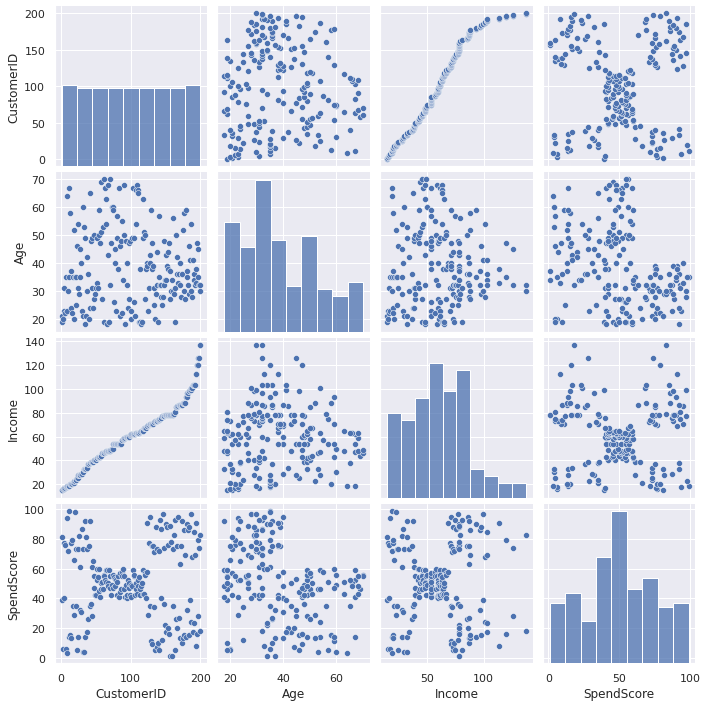

In [ ]:
sns.pairplot(dataset)

CHOSSING COULOUMS

In [ ]:
a = int(input(" first coloum :"))
b = int(input(" second coloum : "))
X = dataset.iloc[:,[a,b]].values


 first coloum :3
 second coloum : 4


VISUALIZING DATA

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


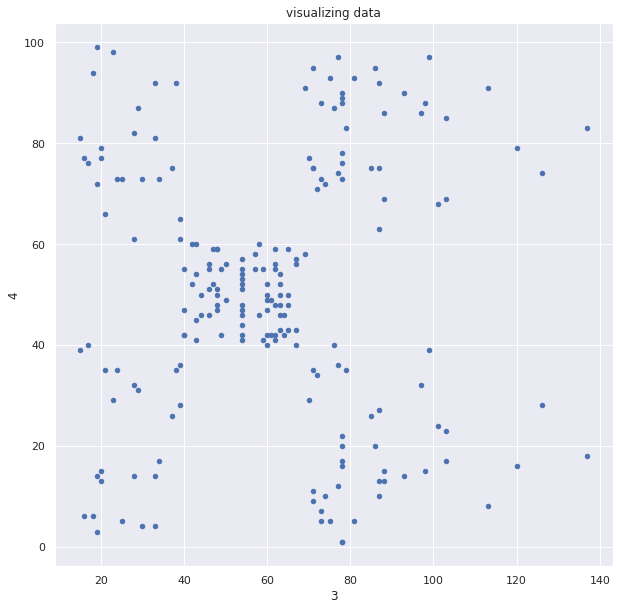

In [ ]:
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel(a)
plt.ylabel(b)
plt.title('visualizing data')
plt.show()

DECLARING NEIGHBOURS

In [ ]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

SORTING AND PLOTING

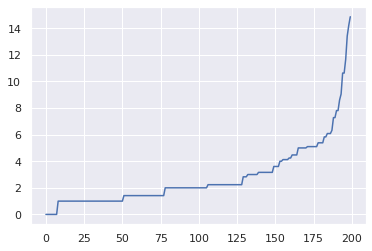

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

RUNNING DBSCAN AND GENERATING CLUSTERS

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=3).fit(X) #selecting epsilon and minimum points value
cluster = clustering.labels_
n_clusters = len(set(cluster)) - (1 if -1 in cluster else 0 )
print("No of clusters generated :",n_clusters)

No of clusters generated : 12


CREATING FUNCTION 

In [ ]:
def DBSCAN_CLUSTERING(X, cluster):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {-1:'red', 0:'blue', 1:'orange', 2:'green', 3:'skyblue', 4:'pink', 5:'purple', 6:'magenta', 7:'teal', 8:'lime', 9:'olive', 10:'yellow', 11:'navy'}
    fig, ax = plt.subplots(figsize=(10,10))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title('clustered data for mall')
    plt.show()

CALLING FUNCTION 


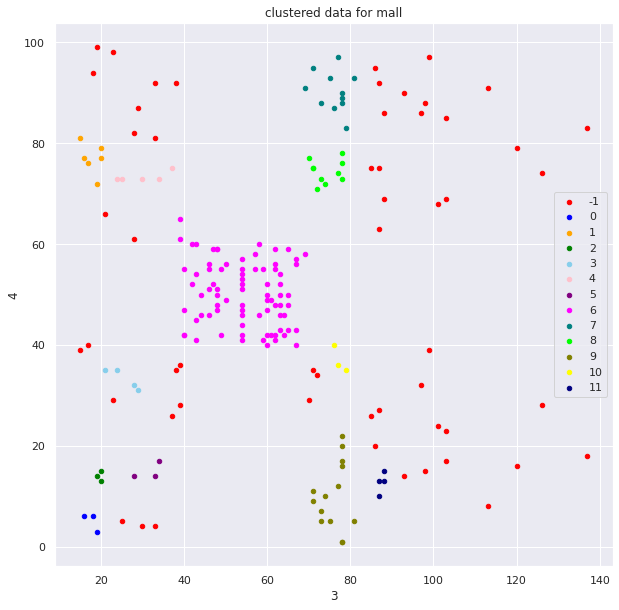

In [ ]:
DBSCAN_CLUSTERING(X, cluster)